In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

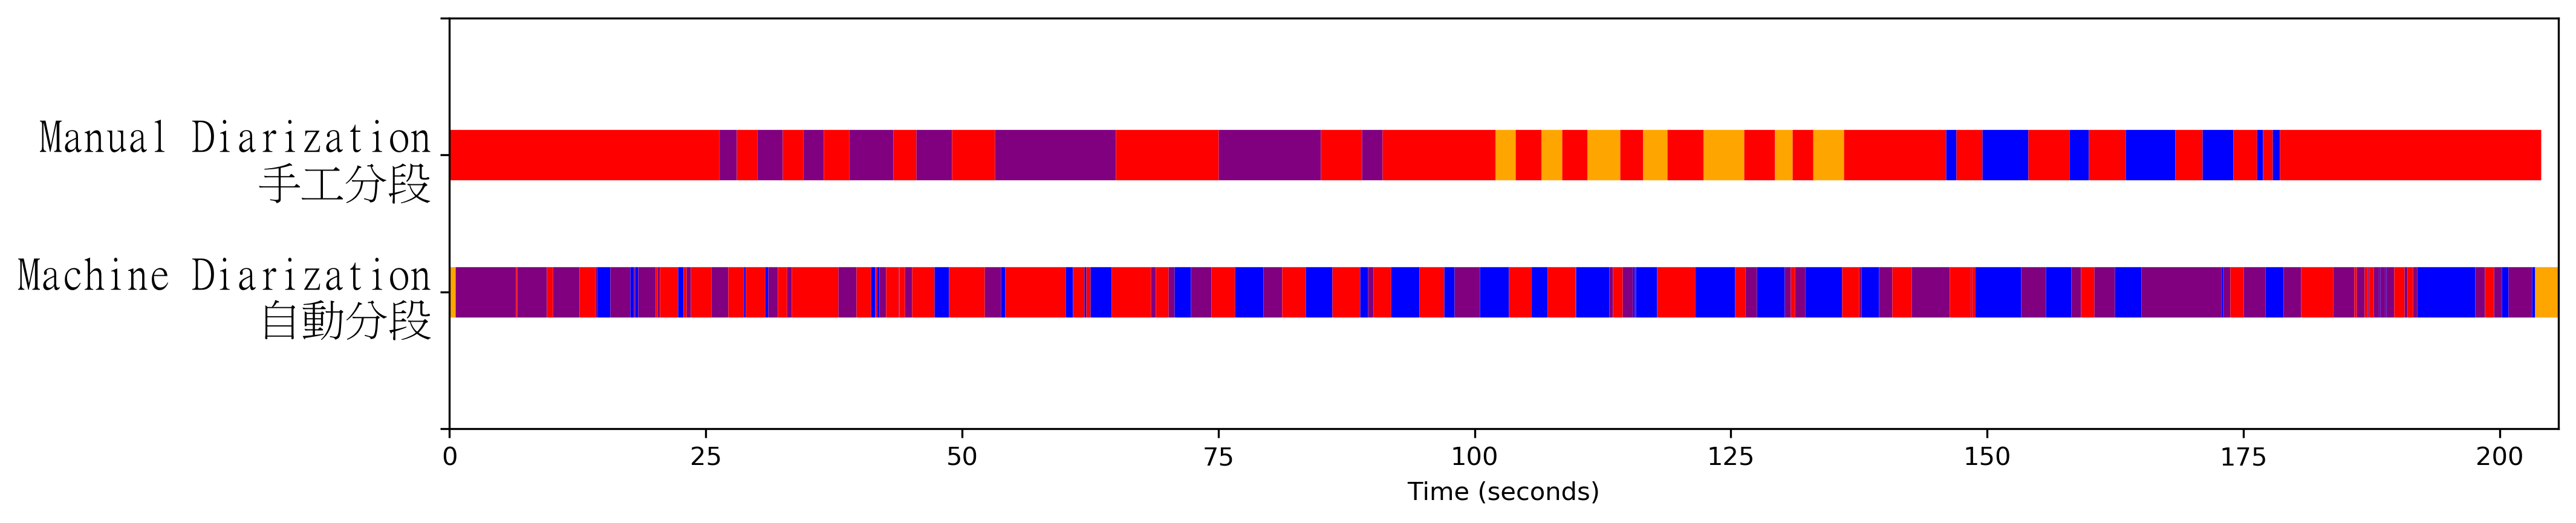

In [18]:
vid=16
man_data = np.genfromtxt(f'VOA_audio\\clean_segs\\{vid}.txt',delimiter=',')   # array([[1,2,0],[2,4,1],[4,9,0],...])
mach_data = np.genfromtxt(f'VOA_audio\\mach_segs\\{vid}.txt',delimiter=',')
colors = {0:'red',1:'purple',2:'orange',3:'blue',4:'yellow',5:'pink',6:'green',7:'black'}

man_segs= []
man_tags = []
mach_segs=[]
mach_tags=[]
for i in (man_data):
    man_segs.append([i[0],i[1]])
    man_tags.append(i[2])
for i in (mach_data):
    mach_segs.append([i[0],i[1]])
    mach_tags.append(i[2])

man_colors = []
mach_colors=[]
for i in man_tags:
    if i in colors:
        man_colors.append(colors[i])
for i in mach_tags:
    if i in colors:
        mach_colors.append(colors[i])
man_line = [[2,2] for i in man_segs]
mach_line = [[1,1] for i in mach_segs]

figure(figsize=(15,3), dpi=300)
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='c:\\windows\\fonts\\mingliu.ttc',size='xx-large')

for i,j,z in zip(man_segs,man_line,man_colors):
    plt.plot(i,j,color=z,linewidth=20,solid_capstyle='butt')
for i,j,z in zip(mach_segs,mach_line,mach_colors):
    plt.plot(i,j,color=z,linewidth=20,solid_capstyle='butt')
#
'''
ovlp = [18.7,20.5,21.6,22.8,23.6,29,33.3,35.7,43,44.4]    # <-------------------------- manually insert overlap segments
for i in ovlp:
    plt.axvline(x=i,linestyle='--',color='black')
for i in np.arange(0,len(ovlp)):
    if i%2==0:
        plt.text(ovlp[i]+.1,.9,f'seg\n{i}-{i+1}')
        plt.text(ovlp[i]+.1,1.9,f'seg\n{i}-{i+1}')

acc_segs=[]
for i in np.arange(0,len(ovlp)):
    if i%2!=0:
        x=ovlp[i]-ovlp[i-1]
        acc_segs.append(x)
sum(acc_segs)/man_segs[-1][1]
plt.title(f'Accuracy: {round(sum(acc_segs)/man_segs[-1][1],4)}%')
#
'''

plt.ylim(0,3)
plt.xlim(0,mach_segs[-1][1])
plt.xlabel('Time (seconds)')
plt.yticks([0,1,2,3],["","Machine Diarization\n自動分段","Manual Diarization\n手工分段",""],fontproperties=font)
plt.show()